In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import xgboost
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SpatialDropout1D
from tensorflow.keras.layers import LSTM,Dropout
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import RandomizedSearchCV
from numpy import array
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv


In [2]:
train=pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

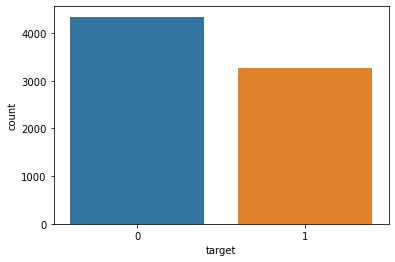

In [6]:
sns.countplot("target",data=train)

# DATA PREPROCESSING

Let initiliaze our stemmer and tokenizer and do some data processing

In [7]:
tweettoken = TweetTokenizer(strip_handles=True, reduce_len=True)

In [8]:
stemmer=PorterStemmer()

In [9]:
collect=[]
collecttest=[]
def preprocess(t,kpc):
    tee=re.sub('[^a-zA-Z]'," ",t)
    tee=tee.lower()
    res=tweettoken.tokenize(tee)
    for i in res:
        if i in stopwords.words('english'):
            res.remove(i)
    rest=[]
    for k in res:
        rest.append(stemmer.stem(k))
    ret=" ".join(rest)
    if kpc==1:
        collect.append(ret)
    elif kpc==0:
        collecttest.append(ret)

In [10]:
def splitpro(t,q,m):
         for j in range(q):
                 preprocess(t["text"].iloc[j],m)

In [11]:
len(train)

7613

In [12]:
len(test)

3263

In [13]:
splitpro(train,7613,1)

In [14]:
splitpro(test,3263,0)

In [15]:
len(collect)

7613

In [16]:
len(collecttest)

3263

In [17]:
collect[:5]

['deed the reason thi earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place be notifi offic other evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour a school']

In [18]:
collecttest[:5]

['happen terribl car crash',
 'heard earthquak differ citi stay safe everyon',
 'is forest fire spot pond gees flee across street cannot save all',
 'apocalyps light spokan wildfir',
 'typhoon soudelor kill china taiwan']

In [19]:
val=train["target"].values

In [20]:
val

array([1, 1, 1, ..., 1, 1, 1])

# GOING FORWARD WITH ML ALGORITHMS

In [21]:
def tfidf(xx):
    cv=TfidfVectorizer(max_features=200)
    x=cv.fit_transform(xx).toarray()
    return x

In [22]:
y=tfidf(collect)

In [23]:
y[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
len(y[0][:])

200

In [25]:
(x_train,x_test,y_train,y_test) = train_test_split(y,val, train_size=0.80, random_state=42)

In [26]:
rnd_clf=RandomForestClassifier(n_estimators=200,random_state=42)
rnd_clf.fit(x_train,y_train)
rnd_clf.score(x_test,y_test)


0.7413000656598818

In [27]:
m=[300,400,500,600,700,800,900]
for i in m:
    rnd_clf=RandomForestClassifier(n_estimators=i,random_state=42)
    rnd_clf.fit(x_train,y_train)
    t=rnd_clf.score(x_test,y_test)
    print(t)
    print("*"*40)

0.7393302692055155
****************************************
0.7406434668417596
****************************************
0.7426132632961261
****************************************
0.7406434668417596
****************************************
0.7413000656598818
****************************************
0.7380170715692712
****************************************
0.7399868680236376
****************************************


In [28]:
mln=[90,95,100,110,120,130,140,145,150]
for i in mln:
        rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=i,random_state=42)
        rnd_clf.fit(x_train,y_train)
        t=rnd_clf.score(x_test,y_test)
        print(t)
        print("*"*40)

0.7419566644780039
****************************************
0.7413000656598818
****************************************
0.7432698621142482
****************************************
0.7445830597504924
****************************************
0.7419566644780039
****************************************
0.7406434668417596
****************************************
0.7393302692055155
****************************************
0.7406434668417596
****************************************
0.7399868680236376
****************************************


In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
clf.score(x_train,y_train)




0.7408866995073892

In [30]:
from sklearn import svm
C = [1,10,20,25,30,35,40,50]

In [31]:
for i in C:
    svc = svm.SVC(kernel='linear', C=i)
    svc.fit(x_train,y_train)
    t=svc.score(x_test,y_test)
    print(t)

0.7413000656598818
0.7360472751149048
0.7353906762967827
0.7353906762967827
0.7353906762967827
0.7340774786605384
0.7347340774786605
0.7347340774786605


In [32]:
for i in C:
    svc = svm.SVC(kernel='rbf', C=i)
    svc.fit(x_train,y_train)
    t=svc.score(x_test,y_test)
    print(t)

0.7570584372948129
0.7386736703873933
0.7353906762967827
0.7334208798424163
0.7321076822061721
0.7307944845699278
0.7301378857518056
0.7314510833880499


In [33]:
params={
    "eta":[0.01,0.2],
    "min_child_weight":[1,2,3,4,5,6,7,8,9,10],
    "max_depth":[3,6,8,10,15,20,25,30],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5,0.6],
    "subsample":[0.5,0.6,0.7,0.8,0.9],
    "colsample_bytree":[0.6,0.7,0.8,0.8],
    "reg_alpha":[0,0.001,0.005,0.01,0.05],
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
}

In [34]:
classifier=xgboost.XGBClassifier()

In [35]:
random=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring="roc_auc",cv=5,verbose=3)

In [36]:
random.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8, score=0.807, total=  10.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.0s remaining:    0.0s


[CV] subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8, score=0.815, total=   9.6s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.6s remaining:    0.0s


[CV] subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8, score=0.816, total=   9.2s
[CV] subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8, score=0.800, total=  11.1s
[CV] subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8 
[CV]  subsample=0.5, reg_alpha=0, min_child_weight=1, max_depth=20, learning_rate=0.05, gamma=0.1, eta=0.2, colsample_bytree=0.8, score=0.789, total=  10.1s
[CV] subsample=0.7, reg_alpha=0.05, min_child_weight=8, max_depth=8, learning_rate=0.1, gamma=0.1, eta=0.01, colsample_bytree=0.8 
[CV]  subsa

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           verbosity=None),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                

In [37]:
random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.2, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.01, gamma=0.4,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)



In [39]:
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.7550886408404465

In [40]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)
log_clf.score(x_test,y_test)

0.747209455022981

In [41]:
from sklearn.ensemble import VotingClassifier

In [42]:
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=100,random_state=42)
svc = svm.SVC(kernel='rbf',probability=True, C=1)
clf = MultinomialNB()
voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf', rnd_clf), ('svc', svc),('clf',clf)],voting='soft')
voting_clf.fit(x_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=100,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('svc', SVC(C=1, probability=True)),
                             ('clf', MultinomialNB())],
                 voting='soft')

In [43]:
from sklearn.metrics import accuracy_score
y_pred=voting_clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.7590282337491793

In [44]:
ytt=tfidf(collecttest)

In [45]:
ttttt=voting_clf.predict(ytt)

In [46]:
ttttt

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
r = pd.Series(ttttt,name="target")

In [48]:
sample=pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

In [49]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [50]:
t=test["id"]

In [51]:
t

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [52]:
submiss = pd.concat([pd.Series(t,name = "id"),r],axis = 1)

In [53]:
submiss

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,1
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [54]:
submiss.to_csv("disasml.csv",index=False)

# GOING FORWARD WITH KERAS

In [55]:
collect[:5]

['deed the reason thi earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place be notifi offic other evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour a school']

In [56]:
voc_size=5000

In [57]:
oneh=[]
for i in collect:
    t=one_hot(i,voc_size)
    oneh.append(t)

In [58]:
sent_length=30
embedded=pad_sequences(oneh,padding='pre',maxlen=sent_length)
print(embedded)

[[   0    0    0 ... 4311 3805 4590]
 [   0    0    0 ... 3850 4181 2245]
 [   0    0    0 ... 3725 3171 3356]
 ...
 [   0    0    0 ... 1723 4313 2367]
 [   0    0    0 ...  541 3956 2669]
 [   0    0    0 ... 1723 1933 4465]]


In [59]:
embedded

array([[   0,    0,    0, ..., 4311, 3805, 4590],
       [   0,    0,    0, ..., 3850, 4181, 2245],
       [   0,    0,    0, ..., 3725, 3171, 3356],
       ...,
       [   0,    0,    0, ..., 1723, 4313, 2367],
       [   0,    0,    0, ...,  541, 3956, 2669],
       [   0,    0,    0, ..., 1723, 1933, 4465]], dtype=int32)

In [60]:

embedded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   78,
        175, 4213, 1967, 4534, 2417, 4311, 3805, 4590], dtype=int32)

In [61]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(100,activation="relu",return_sequences=True)))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu",return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(100,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
val

array([1, 1, 1, ..., 1, 1, 1])

In [63]:
emoneh=np.array(embedded)

In [64]:
len(emoneh)

7613

In [65]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(emoneh,val, test_size=0.33, random_state=42)


In [66]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=2)

Epoch 1/10
80/80 - 22s - loss: 0.6554 - accuracy: 0.5976 - val_loss: 0.5628 - val_accuracy: 0.7390
Epoch 2/10
80/80 - 19s - loss: 0.4527 - accuracy: 0.8057 - val_loss: 0.4686 - val_accuracy: 0.7931
Epoch 3/10
80/80 - 20s - loss: 0.3304 - accuracy: 0.8676 - val_loss: 0.4880 - val_accuracy: 0.7835
Epoch 4/10
80/80 - 21s - loss: 0.2669 - accuracy: 0.8973 - val_loss: 0.5436 - val_accuracy: 0.7768
Epoch 5/10
80/80 - 19s - loss: 0.2239 - accuracy: 0.9161 - val_loss: 0.6304 - val_accuracy: 0.7644
Epoch 6/10
80/80 - 20s - loss: 0.2602 - accuracy: 0.9275 - val_loss: 0.5620 - val_accuracy: 0.7644
Epoch 7/10
80/80 - 21s - loss: 0.1703 - accuracy: 0.9408 - val_loss: 0.8249 - val_accuracy: 0.7449
Epoch 8/10
80/80 - 20s - loss: 0.1177 - accuracy: 0.9580 - val_loss: 0.8924 - val_accuracy: 0.7437
Epoch 9/10
80/80 - 20s - loss: 1228.4928 - accuracy: 0.9610 - val_loss: 1.0930 - val_accuracy: 0.7461
Epoch 10/10
80/80 - 21s - loss: 0.0980 - accuracy: 0.9635 - val_loss: 1.1373 - val_accuracy: 0.7529


In [67]:
y_pred=model.predict_classes(X_test)


In [68]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [69]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test,y_pred)

array([[1259,  187],
       [ 434,  633]])

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7528849980103463

In [73]:
oneht=[]
for i in collecttest:
    t=one_hot(i,voc_size)
    oneht.append(t)

In [74]:
embedd=pad_sequences(oneht,padding='pre',maxlen=sent_length)

In [75]:
emoneht=np.array(embedd)

In [76]:
emoneht

array([[   0,    0,    0, ..., 4171,  331,  373],
       [   0,    0,    0, ..., 4366, 3570, 2479],
       [   0,    0,    0, ..., 1806, 4714, 2216],
       ...,
       [   0,    0,    0, ..., 2966, 1723, 4868],
       [   0,    0,    0, ..., 1723,  167,  331],
       [   0,    0,    0, ..., 3230, 2520, 3640]], dtype=int32)

In [77]:
ans=model.predict(emoneht)

In [78]:
pred=ans.flatten()

In [79]:
len(pred)

3263

In [80]:
for i in range(3263):
    pred[i]=round(pred[i])

In [81]:
pred

array([0., 1., 1., ..., 0., 1., 0.], dtype=float32)

In [82]:
r = pd.Series(pred,name="target")

In [83]:
r

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
3258    1.0
3259    1.0
3260    0.0
3261    1.0
3262    0.0
Name: target, Length: 3263, dtype: float32

In [84]:
t=test["id"]

In [85]:
t

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [86]:
submiss = pd.concat([pd.Series(t,name = "id"),r],axis = 1)

In [87]:
submiss.to_csv("disaskeras.csv",index=False)